<a href="https://colab.research.google.com/github/aiswaryam2005/Indian-Currency-Classification-System-for-Visually-Impaired-Paired-People/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
# Define paths
train_dir = '/content/drive/MyDrive/IndianBankNotes/Training'
validation_dir = '/content/drive/MyDrive/IndianBankNotes/Validation'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1280 images belonging to 10 classes.
Found 80 images belonging to 10 classes.


In [ ]:
# Load the VGG16 model with pre-trained weights and exclude the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Define the VGG16-based model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


58889256/58889256 [==============================] - 1s 0us/step


In [ ]:

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)


In [ ]:
# Train the VGG16-based model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,  # Increase the number of epochs for better results
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/20
40/40 [==============================] - 851s 21s/step - loss: 2.3737 - accuracy: 0.1219 - val_loss: 2.2682 - val_accuracy: 0.1406 - lr: 0.0010
Epoch 2/20
40/40 [==============================] - 781s 20s/step - loss: 2.2056 - accuracy: 0.1695 - val_loss: 2.1739 - val_accuracy: 0.2344 - lr: 0.0010
Epoch 3/20
40/40 [==============================] - 778s 19s/step - loss: 2.0555 - accuracy: 0.2578 - val_loss: 2.0693 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 4/20
40/40 [==============================] - 776s 19s/step - loss: 1.9546 - accuracy: 0.3258 - val_loss: 1.9996 - val_accuracy: 0.2656 - lr: 0.0010
Epoch 5/20
40/40 [==============================] - 770s 19s/step - loss: 1.8583 - accuracy: 0.3492 - val_loss: 1.8542 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 6/20
40/40 [==============================] - 768s 19s/step - loss: 1.7770 - accuracy: 0.3953 - val_loss: 1.8161 - val_accuracy: 0.3906 - lr: 0.0010
Epoch 7/20
40/40 [==============================] - 770s 19s/step - lo

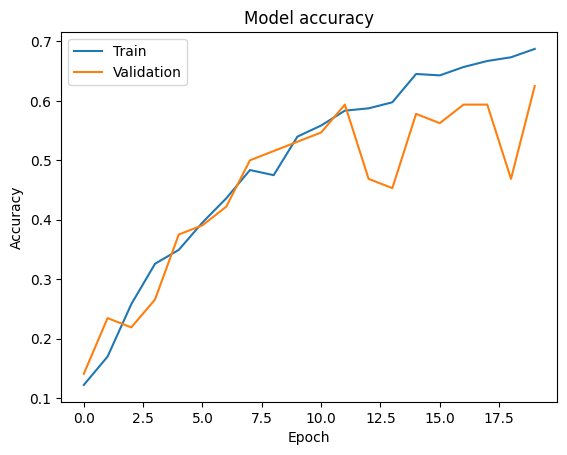

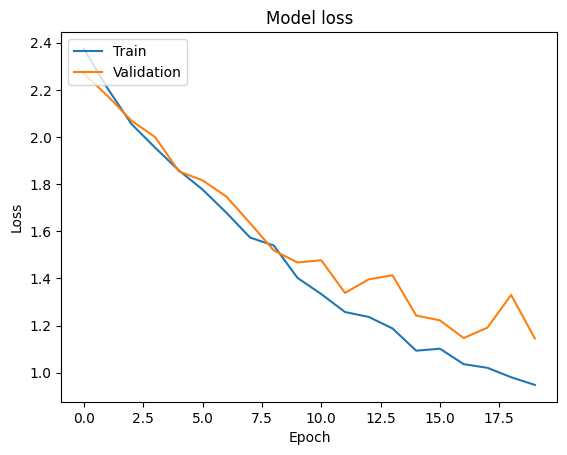

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Save the improved model
model.save('indian_currency_classifier_VGG16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
# Load the model
model = tf.keras.models.load_model('indian_currency_classifier_VGG16.h5')

# Get class labels
class_names = list(train_generator.class_indices.keys())

# Predict on the validation dataset
val_generator = validation_generator
val_generator.reset()  # Reset the generator to start from the beginning
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size, verbose=1)

# Convert predictions to class labels
predicted_class_indices = np.argmax(predictions, axis=1)

# Get true labels
true_class_indices = val_generator.classes
true_class_indices = true_class_indices[:len(predicted_class_indices)]  # Ensure the lengths match

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Print results
for i, (true_idx, pred_idx) in enumerate(zip(true_class_indices, predicted_class_indices)):
    true_label = class_labels[true_idx]
    pred_label = class_labels[pred_idx]
    print(f"Sample {i}: True Label: {true_label}, Predicted Label: {pred_label}")

# Print overall accuracy on validation dataset
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


2/2 [==============================] - 46s 26s/step
Sample 0: True Label: INDIA100NEW, Predicted Label: INDIA100NEW
Sample 1: True Label: INDIA100NEW, Predicted Label: INDIA50OLD
Sample 2: True Label: INDIA100NEW, Predicted Label: INDIA10NEW
Sample 3: True Label: INDIA100NEW, Predicted Label: INDIA10NEW
Sample 4: True Label: INDIA100NEW, Predicted Label: INDIA10NEW
Sample 5: True Label: INDIA100NEW, Predicted Label: INDIA10NEW
Sample 6: True Label: INDIA100NEW, Predicted Label: INDIA10OLD
Sample 7: True Label: INDIA100NEW, Predicted Label: INDIA10NEW
Sample 8: True Label: INDIA100OLD, Predicted Label: INDIA50OLD
Sample 9: True Label: INDIA100OLD, Predicted Label: INDIA10NEW
Sample 10: True Label: INDIA100OLD, Predicted Label: INDIA100OLD
Sample 11: True Label: INDIA100OLD, Predicted Label: INDIA50OLD
Sample 12: True Label: INDIA100OLD, Predicted Label: INDIA50NEW
Sample 13: True Label: INDIA100OLD, Predicted Label: INDIA10NEW
Sample 14: True Label: INDIA100OLD, Predicted Label: INDIA20

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

3/3 [==============================] - 45s 13s/step - loss: 1.2864 - accuracy: 0.5625
Validation Loss: 1.2863506078720093
Validation Accuracy: 56.25%


3/3 [==============================] - 46s 14s/step


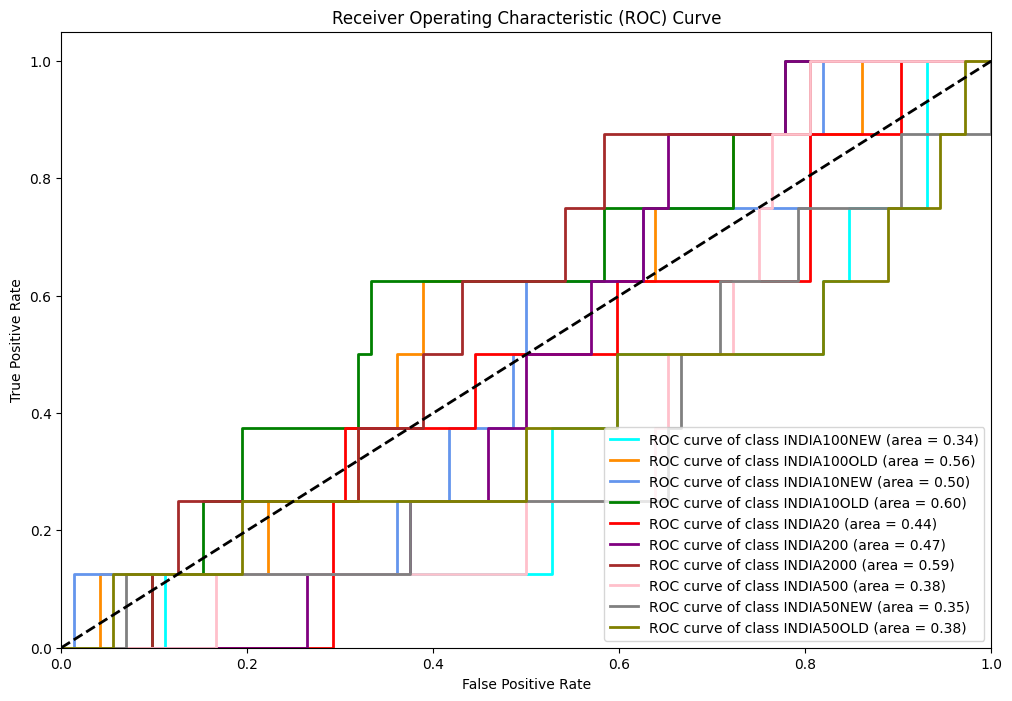

Classification Report:
              precision    recall  f1-score   support

 INDIA100NEW       0.00      0.00      0.00         8
 INDIA100OLD       0.14      0.12      0.13         8
  INDIA10NEW       0.07      0.25      0.11         8
  INDIA10OLD       0.10      0.12      0.11         8
     INDIA20       0.00      0.00      0.00         8
    INDIA200       0.00      0.00      0.00         8
   INDIA2000       0.00      0.00      0.00         8
    INDIA500       0.00      0.00      0.00         8
  INDIA50NEW       0.11      0.12      0.12         8
  INDIA50OLD       0.17      0.12      0.14         8

    accuracy                           0.07        80
   macro avg       0.06      0.07      0.06        80
weighted avg       0.06      0.07      0.06        80



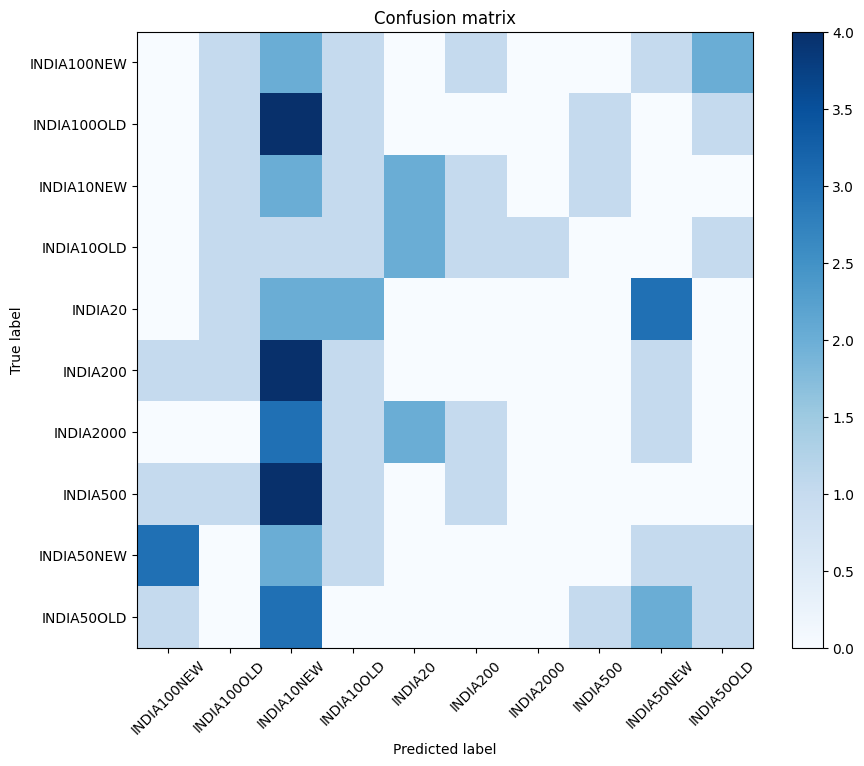

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Predict probabilities for validation data
validation_generator.reset()  # Reset generator to start for validation data
y_pred = model.predict(validation_generator)

# Get true classes
y_true = validation_generator.classes

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Binarize the output
n_classes = len(validation_generator.class_indices)
y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_labels))

# Plot confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(validation_generator.class_indices))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Predict probabilities for validation data
validation_generator.reset()  # Reset generator to start for validation data
y_pred = model.predict(validation_generator)

# Get true classes
y_true = validation_generator.classes

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Convert predicted probabilities to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Calculate model evaluation accuracy
eval_result = model.evaluate(validation_generator)
model_accuracy = eval_result[1]  # Assuming the second value is accuracy

# Generate classification report
report = classification_report(y_true, y_pred_class, target_names=class_labels, output_dict=True)

# Extract metrics
report_accuracy = report['accuracy']
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']

# Print metrics
print(f"Model Evaluation Accuracy: {model_accuracy:.2f}")
print(f"Classification Report Accuracy: {report_accuracy:.2f}")
print(f"Macro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")
print(f"Macro F1-score: {macro_f1:.2f}")
print(f"Weighted Precision: {weighted_precision:.2f}")
print(f"Weighted Recall: {weighted_recall:.2f}")
print(f"Weighted F1-score: {weighted_f1:.2f}")


3/3 [==============================] - 46s 13s/step - loss: 1.3017 - accuracy: 0.5375
Model Evaluation Accuracy: 0.54
Classification Report Accuracy: 0.10
Macro Precision: 0.13
Macro Recall: 0.10
Macro F1-score: 0.11
Weighted Precision: 0.13
Weighted Recall: 0.10
Weighted F1-score: 0.11


3/3 [==============================] - 46s 13s/step


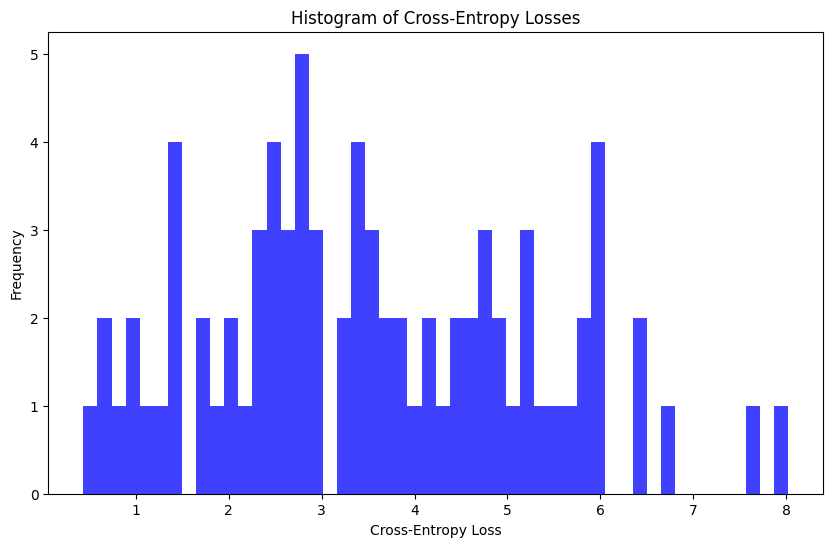

Average Cross-Entropy Loss: 3.5582


In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for validation data
validation_generator.reset()  # Reset generator to start for validation data
y_pred = model.predict(validation_generator)

# Get true classes
y_true = validation_generator.classes

# Convert true labels to categorical format
y_true_categorical = tf.keras.utils.to_categorical(y_true, num_classes=len(validation_generator.class_indices))

# Compute cross-entropy loss for each sample
cross_entropy_losses = categorical_crossentropy(y_true_categorical, y_pred)

# Plot histogram of cross-entropy losses
plt.figure(figsize=(10, 6))
plt.hist(cross_entropy_losses, bins=50, alpha=0.75, color='blue')
plt.xlabel('Cross-Entropy Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Cross-Entropy Losses')
plt.show()

# Print average cross-entropy loss
average_loss = np.mean(cross_entropy_losses)
print(f'Average Cross-Entropy Loss: {average_loss:.4f}')

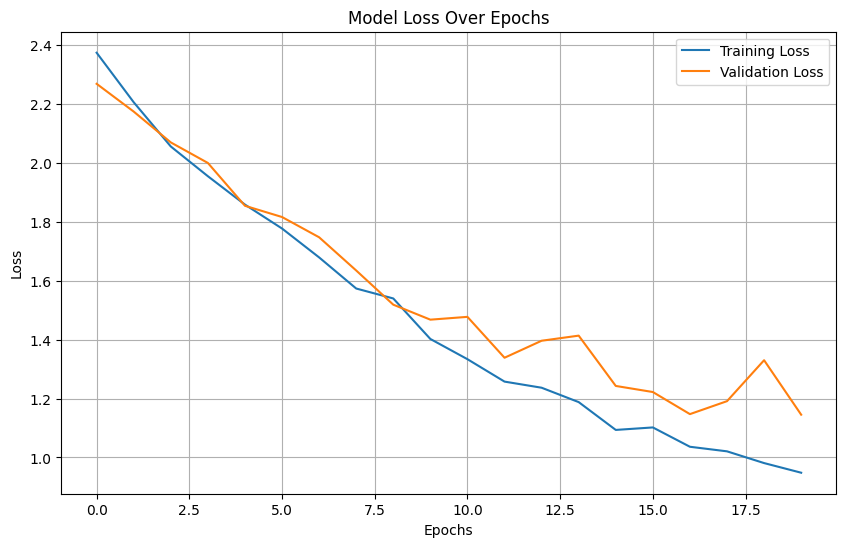

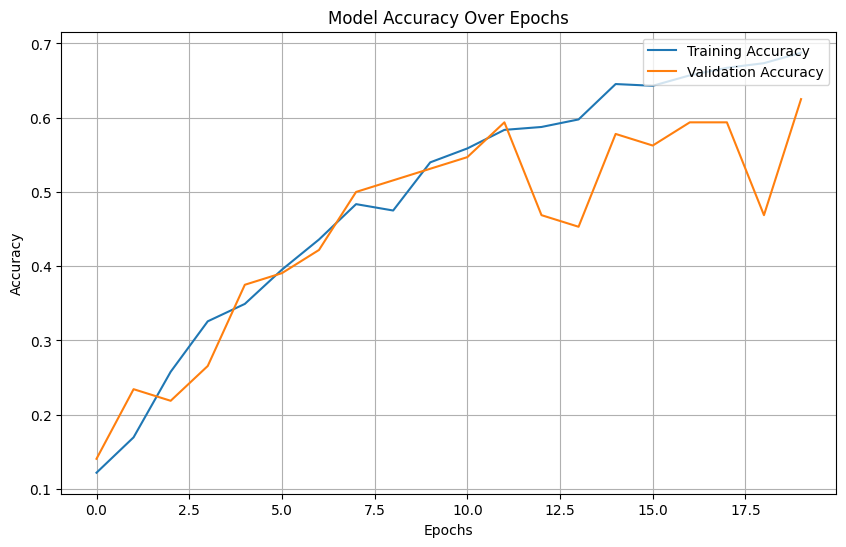

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

3/3 [==============================] - 49s 14s/step


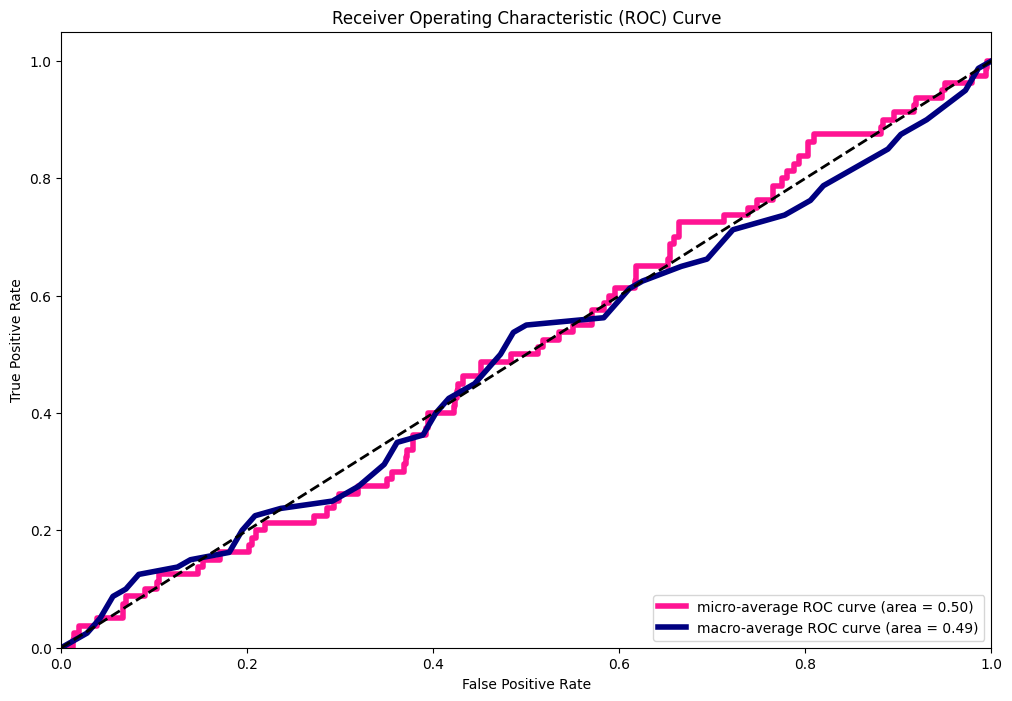

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Predict probabilities for validation data
validation_generator.reset()  # Reset generator to start for validation data
y_pred = model.predict(validation_generator)

# Get true classes
y_true = validation_generator.classes

# Binarize the output
n_classes = len(validation_generator.class_indices)
y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot macro-average ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle='-', linewidth=4,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})')
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='-', linewidth=4,
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
